<a href="https://colab.research.google.com/github/NarawitPrathansap/AIPrototype2023/blob/main/Tensorflow_(Deep_Learning_Implementation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Sequential (ง่าย แต่สร้างได้แต่แบบไม่ซับซ้อน)
2. Functional

# Import

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define

In [2]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.Input(shape=(4,)),
        layers.Dense(2, activation='relu',name='layer1'),
        layers.Dense(3, activation='relu',name='layer2'),
        layers.Dense(5,activation='softmax', name='output')
    ]
)

In [3]:
model.summary()
#bias ไม่รับ input

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 output (Dense)              (None, 5)                 20        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Predict

In [4]:
# Call model on a text input
x = tf.ones((5,4))

In [5]:
x

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [6]:
y = model(x)

In [7]:
y

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.16990435, 0.16502477, 0.24383521, 0.21812099, 0.2031146 ],
       [0.16990435, 0.16502477, 0.24383521, 0.21812099, 0.2031146 ],
       [0.16990435, 0.16502477, 0.24383521, 0.21812099, 0.2031146 ],
       [0.16990435, 0.16502477, 0.24383521, 0.21812099, 0.2031146 ],
       [0.16990435, 0.16502477, 0.24383521, 0.21812099, 0.2031146 ]],
      dtype=float32)>

# สร้าง Sequential แบบที่สอง

In [8]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,)))
model2.add(layers.Dense(2,activation='relu'))
model2.add(layers.Dense(3,activation='relu'))
model2.add(layers.Dense(5,activation='softmax'))

In [9]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 5)                 20        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# ปรับเปลี่ยน Network

In [10]:
model2.pop()

In [11]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model2.add(layers.Dense(6))

In [13]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_3 (Dense)             (None, 6)                 24        
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
x = tf.ones((5, 4))
y = model2(x)
y

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[-0.07942158,  1.2901397 ,  0.8241763 , -0.460456  ,  1.19178   ,
        -0.14877655],
       [-0.07942158,  1.2901397 ,  0.8241763 , -0.460456  ,  1.19178   ,
        -0.14877655],
       [-0.07942158,  1.2901397 ,  0.8241763 , -0.460456  ,  1.19178   ,
        -0.14877655],
       [-0.07942158,  1.2901397 ,  0.8241763 , -0.460456  ,  1.19178   ,
        -0.14877655],
       [-0.07942158,  1.2901397 ,  0.8241763 , -0.460456  ,  1.19178   ,
        -0.14877655]], dtype=float32)>

# ลองเทรน Sequential Model ที่สร้างขึ้นเอง

In [15]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## load data

In [16]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


### แปลงค่าเป็น 0-1 เพื่อนำเข้า network

In [17]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### plot รูปตัวอย่าง

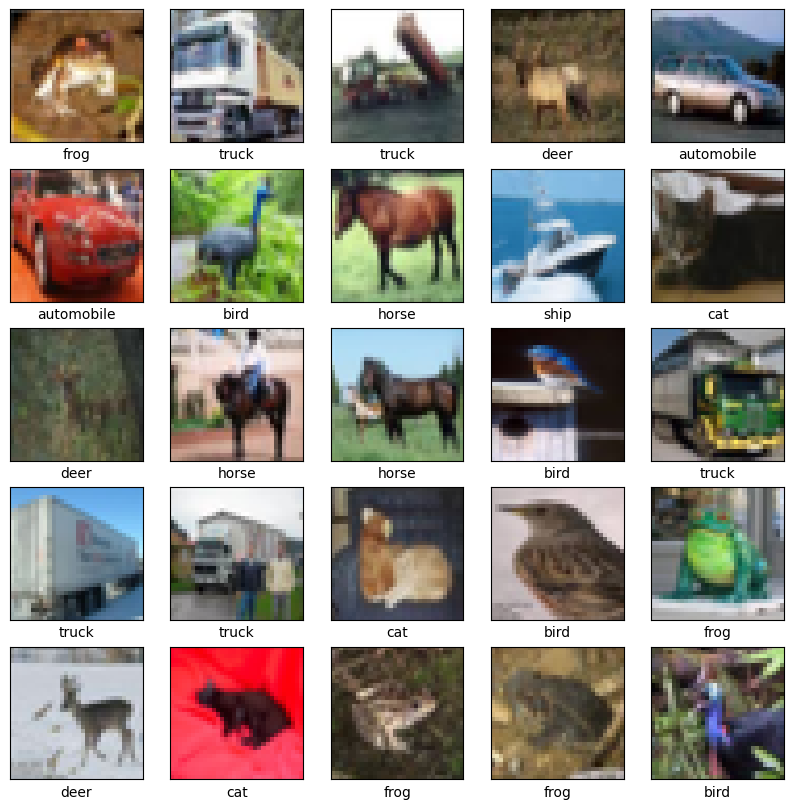

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Define

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

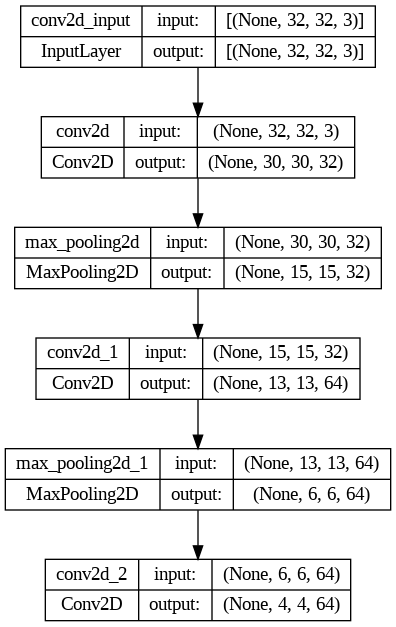

In [21]:
keras.utils.plot_model(model,show_shapes=True)

### ต่อด้วย flatten และ dense เพื่อทำนาย

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

### Define training parameters

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train

In [25]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [26]:
history = model.fit(train_images, train_labels, epochs=2,
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 13s 5ms/step - loss: 1.5443 - accuracy: 0.4374 - val_loss: 1.3660 - val_accuracy: 0.4941
Epoch 2/2
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1904 - accuracy: 0.5756 - val_loss: 1.1390 - val_accuracy: 0.5869


### Test

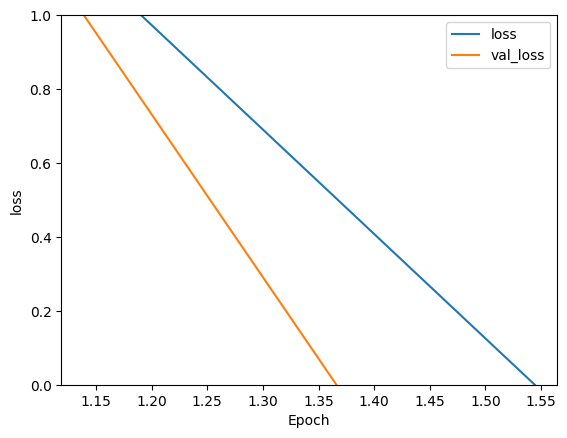

In [27]:
plt.plot(history.history['loss'],[0,1] ,label='loss')
plt.plot(history.history['val_loss'],[0,1], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')

In [28]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.1390 - accuracy: 0.5869 - 627ms/epoch - 2ms/step


In [29]:
print(test_acc)

0.586899995803833


## Functional

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
input_images = keras.Input(shape=(32, 32, 3), name="img")
model = layers.Conv2D(32, (3, 3), activation="relu", name="conv1")(input_images) # (input_images) input จาก layer ก่อนหน้า
model = layers.MaxPooling2D((2, 2), name="maxpool1")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv2")(model)
model = layers.MaxPooling2D((2, 2), name="maxpool2")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv3")(model)
model = layers.Flatten(name="Flatten")(model)
model = layers.Dense(64, activation='relu', name="activation")(model)
output = layers.Dense(10, name="output")(model)

In [32]:
my_model = keras.Model(input_images, output, name = "mymodel")

In [33]:
my_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 Flatten (Flatten)           (None, 1024)              0   

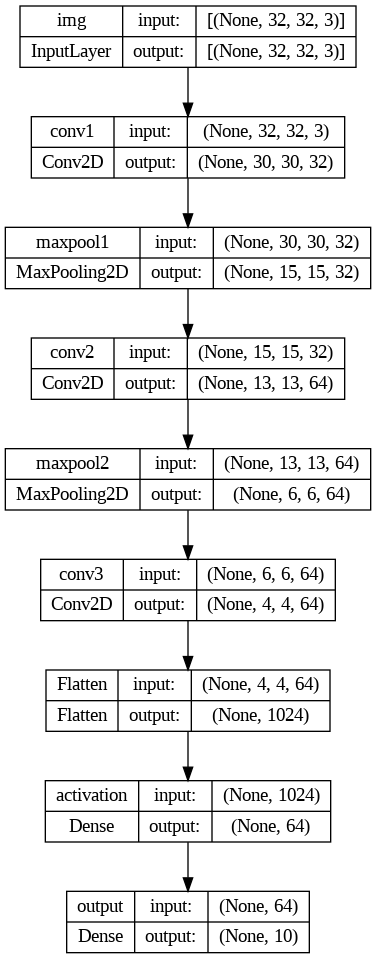

In [34]:
keras.utils.plot_model(my_model, show_shapes=True)

In [35]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
history = my_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4969 - accuracy: 0.4543 - val_loss: 1.2337 - val_accuracy: 0.5582
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1491 - accuracy: 0.5946 - val_loss: 1.0832 - val_accuracy: 0.6201
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9914 - accuracy: 0.6529 - val_loss: 0.9569 - val_accuracy: 0.6641
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8947 - accuracy: 0.6841 - val_loss: 0.9221 - val_accuracy: 0.6795
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8191 - accuracy: 0.7127 - val_loss: 0.9292 - val_accuracy: 0.6745
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7619 - accuracy: 0.7317 - val_loss: 0.8505 - val_accuracy: 0.7039
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7109 - accuracy: 0.7506 - val_loss: 0.8709 - val_accuracy

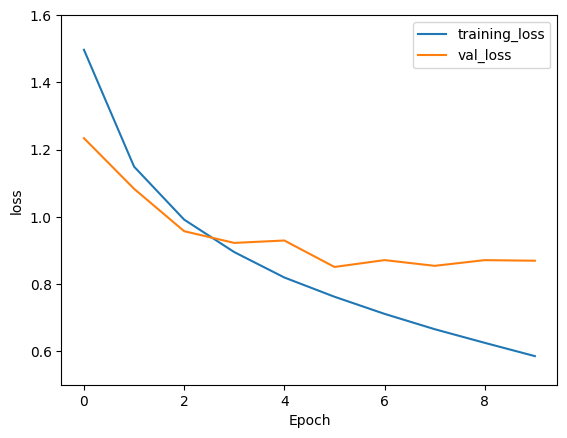

In [37]:

plt.plot(range(10),history.history['loss'],label='training_loss')
plt.plot(range(10),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5, 1.6])
plt.legend(loc='upper right')

In [38]:
print(test_acc)

0.586899995803833


### ResNet

In [39]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

resnet_model = keras.Model(inputs, outputs, name="toy_resnet")
resnet_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 30, 30, 32)           896       ['img[0][0]']                 
                                                                                                  
 conv2d_4 (Conv2D)           (None, 28, 28, 64)           18496     ['conv2d_3[0][0]']            
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 9, 9, 64)             0         ['conv2d_4[0][0]']            
 g2D)                                                                                    

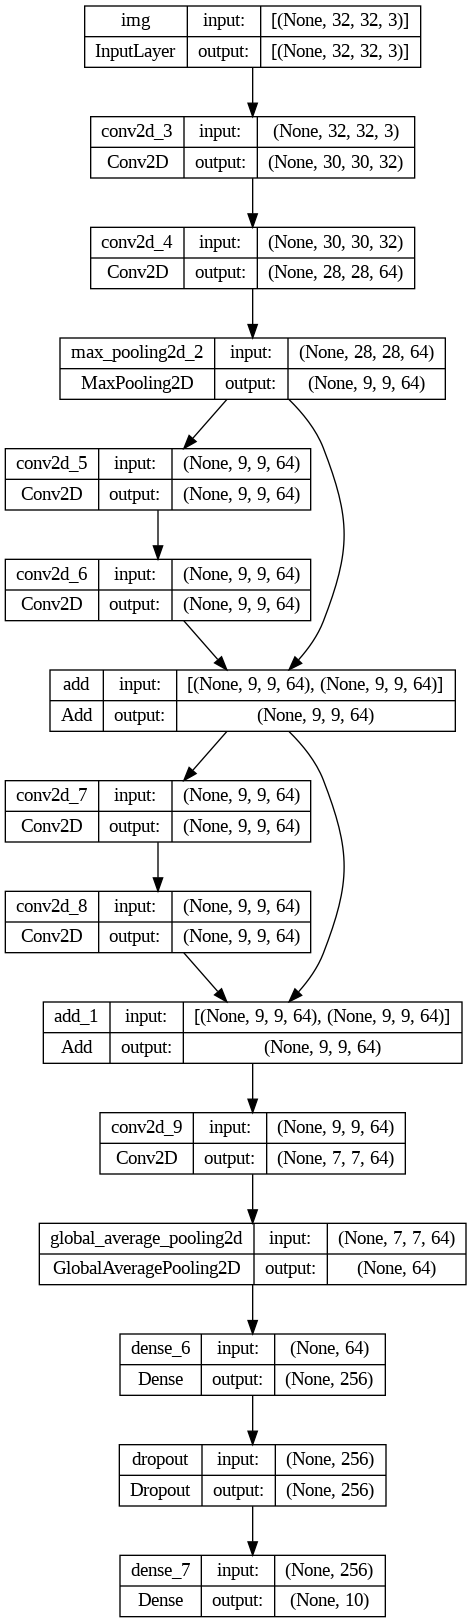

In [40]:
keras.utils.plot_model(resnet_model,  show_shapes=True)

In [41]:
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
history = resnet_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))#data pipe line

Epoch 1/10
1563/1563 [==============================] - 16s 8ms/step - loss: 1.6671 - accuracy: 0.3579 - val_loss: 1.3160 - val_accuracy: 0.5091
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1689 - accuracy: 0.5765 - val_loss: 1.0110 - val_accuracy: 0.6363
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9541 - accuracy: 0.6597 - val_loss: 0.8648 - val_accuracy: 0.6916
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8299 - accuracy: 0.7060 - val_loss: 0.8449 - val_accuracy: 0.7060
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7452 - accuracy: 0.7408 - val_loss: 0.7479 - val_accuracy: 0.7355
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6756 - accuracy: 0.7675 - val_loss: 0.7914 - val_accuracy: 0.7329
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6218 - accuracy: 0.7856 - val_loss: 0.7166 - val_ac

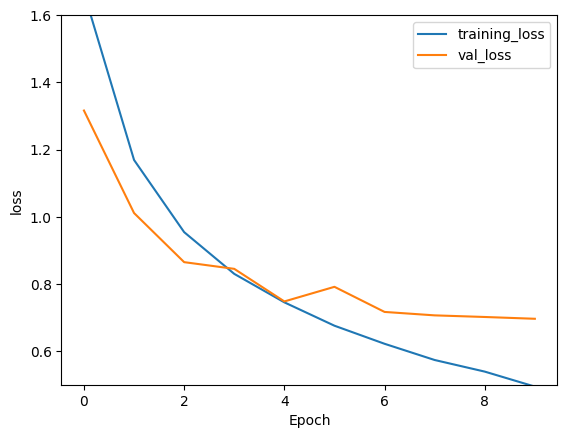

In [43]:

plt.plot(range(10),history.history['loss'],label='training_loss')
plt.plot(range(10),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5, 1.6])
plt.legend(loc='upper right')

In [44]:
print(test_acc)

0.586899995803833


# Tensorflow Data Pipeline

flow from directory

In [45]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [46]:
path2data = '/content/gdrive/MyDrive/Classification Dataset'

In [47]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2)(x)

resnet_model_dm = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet_model_dm.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 198, 198, 32)         896       ['img[0][0]']                 
                                                                                                  
 conv2d_11 (Conv2D)          (None, 196, 196, 64)         18496     ['conv2d_10[0][0]']           
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 65, 65, 64)           0         ['conv2d_11[0][0]']           
 g2D)                                                                               

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path2data,
        # All images will be resized to target height and width.
        target_size=(200, 200),
        batch_size=4,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(height, width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [49]:
from tensorflow.keras import optimizers

In [53]:
resnet_model_dm.compile(optimizer=optimizers.Adam(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
history = resnet_model_dm.fit_generator(
      train_generator,
      steps_per_epoch= 7,
      epochs=50,
      verbose=1)

Epoch 1/50


<ipython-input-54-bd3860035948>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model_dm.fit_generator(


7/7 [==============================] - 3s 54ms/step - loss: 0.7012 - accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 1s 63ms/step - loss: 0.7194 - accuracy: 0.4615
Epoch 3/50
7/7 [==============================] - 1s 67ms/step - loss: 0.6918 - accuracy: 0.5385
Epoch 4/50
7/7 [==============================] - 1s 117ms/step - loss: 0.7084 - accuracy: 0.5385
Epoch 5/50
7/7 [==============================] - 0s 69ms/step - loss: 0.6673 - accuracy: 0.6154
Epoch 6/50
7/7 [==============================] - 1s 69ms/step - loss: 0.7093 - accuracy: 0.5357
Epoch 7/50
7/7 [==============================] - 0s 67ms/step - loss: 0.7178 - accuracy: 0.5000
Epoch 8/50
7/7 [==============================] - 1s 81ms/step - loss: 0.6527 - accuracy: 0.6538
Epoch 9/50
7/7 [==============================] - 1s 107ms/step - loss: 0.6690 - accuracy: 0.5000
Epoch 10/50
7/7 [==============================] - 1s 101ms/step - loss: 0.6645 - accuracy: 0.5769
Epoch 11/50
7/7 [====================

313/313 - 1s - loss: 0.8690 - accuracy: 0.7114 - 959ms/epoch - 3ms/step


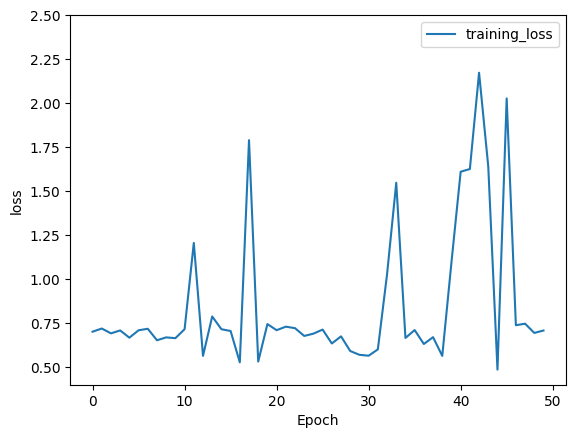

In [60]:
plt.plot(range(50),history.history['loss'],label='training_loss')
#plt.plot(range(10),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.4, 2.5])
plt.legend(loc='upper right')
test_loss, test_acc =my_model.evaluate(test_images,test_labels,verbose=2)